In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si
import sys
sys.path.append('../python/')
import NGC5533_functions as nf
import noordermeer as noord

C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\interpolate\interpolate.py:2752: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.094546e-17
  p = scipy.linalg.solve(Q, tmp)


In [2]:
# Equation (Eq.2) from "Testing Gravitatational Field in Elliptic Galaxies" paper

# parameters
c0 = 6                      #concentration parameter
A = 30                      #centroid velocity amplitude (km/s)
p = 1                       #This parameter was fixed at p = 1, which corresponds to an asymptotically flat rotation curve at large radii

def v(r):
    return A*r / ((r**2 + c0**2)**(p/2))

g_v1 = np.vectorize(v)

## Equation from "Gas rotation, shocks and outflow within the inner 3 kpc of the radio galaxy 3C 33"
# parameters
#vsys = 1.78e4                #systemic velocity (km/s)
#theta = nf.i                 #disk inclination
#c0 = nf.n_c                  #concentration parameter
#psi0 = 83.3*(np.pi/180)      #position angle of the line of nodes
#A = 453.7                    #centroid velocity amplitude (km/s)
#p = 1                        #This parameter was fixed at p = 1, which corresponds to an asymptotically flat rotation curve at large radii

#def v_gas(R,psi,psi0,A,theta,c0,p):
#    vsys + A*R*np.cos(psi-psi0)*np.sin(theta)*(np.cos(theta)**p) / ((R**2((np.sin(psi-psi0)**2)+(np.cos(theta)**2)*(np.cos(psi-psi0)**2))+(c0**2)*(np.cos(theta)**2))**(p/2))
#    r = R * np.cos(psi)
#    y = R * np.sin(psi)
#    theta = nf.i
#    return v_gas(r,y,psi0,A,theta,c0,p)
#g_v = np.vectorize(v_gas)


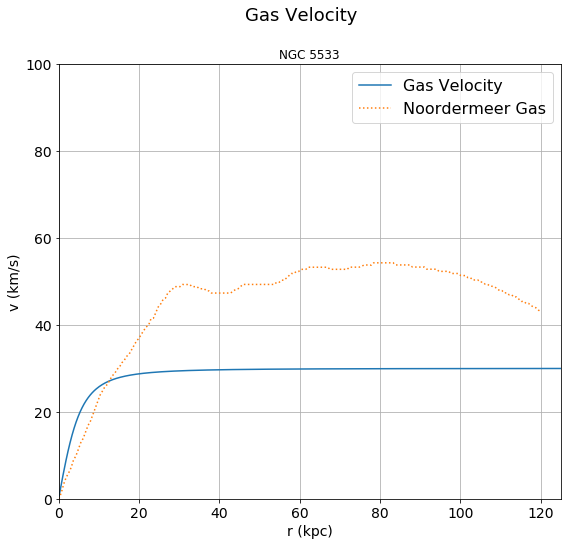

In [3]:
#plot gas velocity
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

r = np.linspace(0.1,125,500)

plt.plot(r, g_v1(r), linestyle='solid', label='Gas Velocity')   
plt.plot(noord.rval, noord.noord_gas, linestyle=':', label="Noordermeer Gas")

fig.suptitle('Gas Velocity', fontsize=18)
ax.set(title='NGC 5533')              #labeling axes
ax.set_xlim(0,125)
ax.set_ylim(0,100)
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('v (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
#plt.savefig('GasVelocity.png')
plt.show()

In [4]:
# From Binney's Galactic Dynamics book

# pg 112, The interstellar medium density

# parameters                
R_g = 2*nf.h_c                    # related to the disk scale length
sigma_g = 0.25*nf.drho00_c        # ISM contributes 25% of the total disk surface density at the solar radius R0
R_m = 4                           # guess
z_g = 0.08                        # thickness of gas, guess
g_pref = 1                        # prefactor

def rho_g(z,r):
    return (sigma_g / (2*z_g)) * np.exp(- r/R_g - R_m/r - np.absolute(z)/z_g)

def g_integral(r): 
    return si.quad(rho_g, 0, np.inf, args=(r))[0]

def g_F(r): 
    a = 4 * np.pi * nf.G * g_integral(r) * g_pref
    return a

g_Fv = np.vectorize(g_F)

def g_v2(r):
    return np.sqrt(r * g_Fv(r))


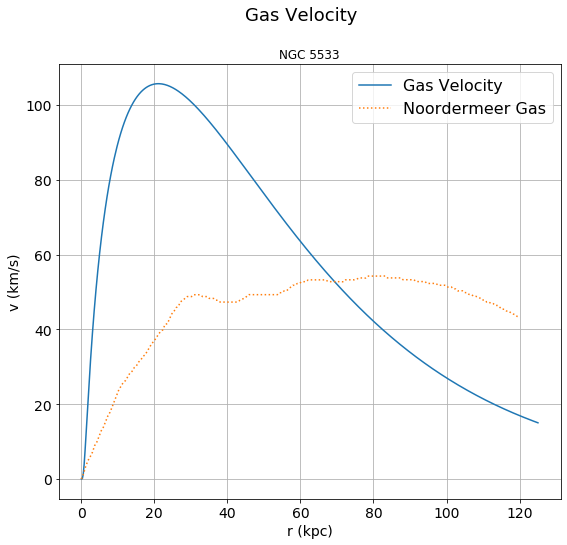

In [5]:
#plot gas velocity
fig = plt.figure(figsize=(9.0,8.0))                #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

plt.plot(r, g_v2(r), linestyle='solid', label='Gas Velocity')   
plt.plot(noord.rval, noord.noord_gas, linestyle=':', label="Noordermeer Gas")

fig.suptitle('Gas Velocity', fontsize=18)
ax.set(title='NGC 5533')              #labeling axes
#ax.set_xlim(0,125)
#ax.set_ylim(0,450)
ax.set_xlabel('r (kpc)', fontsize=14)
ax.set_ylabel('v (km/s)', fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14);

plt.legend(fontsize=16);                                   #adding legend
#plt.savefig('GasVelocity.png')
plt.show()